In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#imports from keras for ANN
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras import backend
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

# imports of useful functions from sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data.rename(columns={'AspectRation':'AspectRatio'},inplace=True) # obvious spelling correction
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [3]:
#Elimination of several features to remove too much corelated features (less than -0.9 or more 0.9)
data8= data.drop(['Area','Perimeter','ConvexArea','EquivDiameter','Compactness',
                    'Eccentricity', 'ShapeFactor1','ShapeFactor3'],axis=1)
# correlation of left features, saving and download
#beans8Corr=beans8.corr()
#beans8Corr.to_csv('beans8Corr.csv')
#files.download('beans8Corr.csv')
Xdata8=data8.drop('Class',axis=1)
Ydata=data["Class"]

In [4]:
from sklearn.preprocessing import LabelEncoder
dataANN=data8
LE = LabelEncoder()
dataANN['code'] = LE.fit_transform(data8['Class'])

In [16]:
from sklearn.model_selection import train_test_split

Xdata=dataANN.drop(['Class','code'],axis=1)
Ydata=dataANN["code"]
# random states used 7,17,27,37,47
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Xdata,Ydata,test_size=0.2,random_state=17)
YtrainKat = np_utils.to_categorical(Ytrain,7)

In [17]:
sc = StandardScaler()
XtrainScal = sc.fit_transform(Xtrain) # średnią i std wyliczam na podstawie tego zbioru
XtestScal = sc.transform(Xtest) # używam średniej i std wyliczonej dla Xtrain


In [18]:
ann=Sequential()

ann.add(Dense(16,input_dim=8,activation = 'relu'))

# Bulding Second and third layer

ann.add(Dense(8,activation='relu'))

# Output Layer
ann.add(Dense(7,activation='softmax'))
ann.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

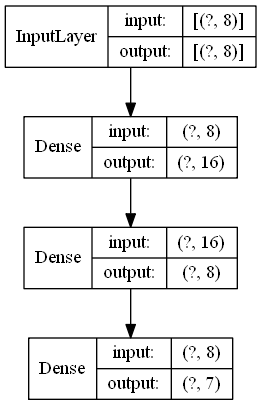

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(ann, to_file='ann.png', show_shapes=True, show_layer_names=False)
#files.download('annSmall.png')

In [8]:
%time histTrain=ann.fit(XtrainScal,YtrainKat,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
273/273 [==============================] - 1s 4ms/step - loss: 1.3352 - accuracy: 0.5280 - val_loss: 0.9115 - val_accuracy: 0.7287
Epoch 2/10
273/273 [==============================] - 1s 2ms/step - loss: 0.6603 - accuracy: 0.8026 - val_loss: 0.4618 - val_accuracy: 0.8609
Epoch 3/10
273/273 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8966 - val_loss: 0.3109 - val_accuracy: 0.9031
Epoch 4/10
273/273 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9214 - val_loss: 0.2467 - val_accuracy: 0.9164
Epoch 5/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.9247 - val_loss: 0.2312 - val_accuracy: 0.9160
Epoch 6/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.9248 - val_loss: 0.2206 - val_accuracy: 0.9178
Epoch 7/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.9259 - val_loss: 0.2142 - val_accuracy: 0.9192
Epoch 

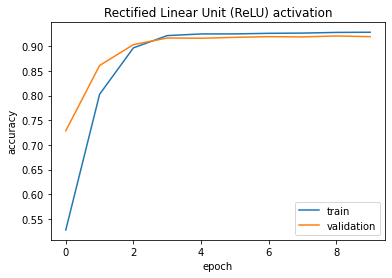

In [9]:
from matplotlib import pyplot as plt
plt.plot(histTrain.history['accuracy'])
plt.plot(histTrain.history['val_accuracy'])
plt.title('Rectified Linear Unit (ReLU) activation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

In [39]:
%time YpredKatSmall=ann.predict(XtestScal) # prediction by ANN
YpredSmall= np.argmax(YpredKatSmall,axis=1) # move from one-hot encoder to classes

print( "Compare data formats\n", 'YpredKat[0] = ', YpredKatSmall[0],"\n Ypred[0] = ",YpredSmall[0])
accSmall=accuracy_score(YpredSmall,Ytest)
print('Accuracy = ', accSmall)

Wall time: 72.8 ms
Porównanie formatów danych 
 YpredKat[0] =  [2.82046414e-04 9.99677896e-01 4.00765421e-05 1.95712846e-19
 3.84285804e-15 1.02044824e-13 1.39959013e-16] 
 Ypred[0] =  1
Trafność dla sieci gęstej =  0.9184722732280572


In [10]:
annElu=Sequential()

annElu.add(Dense(16,input_dim=8,activation = 'elu'))

# Bulding Second and third layer

annElu.add(Dense(8,activation='elu'))

# Output Layer
annElu.add(Dense(7,activation='softmax'))
annElu.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
%time histTrainElu=annElu.fit(XtrainScal,YtrainKat,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
273/273 [==============================] - 1s 4ms/step - loss: 1.1102 - accuracy: 0.6098 - val_loss: 0.6580 - val_accuracy: 0.7920
Epoch 2/10
273/273 [==============================] - 1s 3ms/step - loss: 0.4900 - accuracy: 0.8558 - val_loss: 0.3783 - val_accuracy: 0.8921
Epoch 3/10
273/273 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.9140 - val_loss: 0.2741 - val_accuracy: 0.9114
Epoch 4/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.9226 - val_loss: 0.2346 - val_accuracy: 0.9187
Epoch 5/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2266 - accuracy: 0.9256 - val_loss: 0.2209 - val_accuracy: 0.9224
Epoch 6/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2176 - accuracy: 0.9276 - val_loss: 0.2155 - val_accuracy: 0.9229
Epoch 7/10
273/273 [==============================] - 1s 3ms/step - loss: 0.2134 - accuracy: 0.9280 - val_loss: 0.2141 - val_accuracy: 0.9224
Epoch 

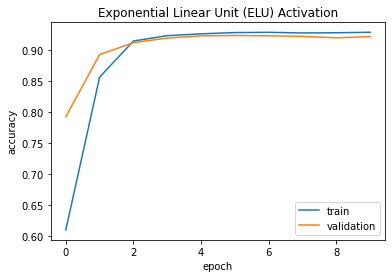

In [12]:
from matplotlib import pyplot as plt
plt.plot(histTrainElu.history['accuracy'])
plt.plot(histTrainElu.history['val_accuracy'])
plt.title('Exponential Linear Unit (ELU) Activation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

In [83]:
%time YpredKatSmall=annElu.predict(XtestScal) #
YpredSmall= np.argmax(YpredKatSmall,axis=1) # 
# 
print( "compare data format \n", 'YpredKat[0] = ', YpredKatSmall[0],"\n Ypred[0] = ",YpredSmall[0])
accSmallElu=accuracy_score(YpredSmall,Ytest)
print('Accuracy = ', accSmallElu)

Wall time: 55.2 ms
Porównanie formatów danych 
 YpredKat[0] =  [7.4387758e-20 4.4119436e-10 6.8556775e-17 9.9999499e-01 1.5577271e-07
 2.9967759e-07 4.5500328e-06] 
 Ypred[0] =  3
Trafność dla sieci gęstej =  0.9206757253029747


In [19]:
annSig=Sequential()

annSig.add(Dense(16,input_dim=8,activation = 'sigmoid'))

# Bulding Second and third layer

annSig.add(Dense(8,activation='sigmoid'))

# Output Layer
annSig.add(Dense(7,activation='softmax'))
annSig.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
%time histTrainSig=annSig.fit(XtrainScal,YtrainKat,epochs=30,batch_size=32,validation_split=0.2)

Epoch 1/30
273/273 [==============================] - 1s 4ms/step - loss: 1.8438 - accuracy: 0.2546 - val_loss: 1.6657 - val_accuracy: 0.2599
Epoch 2/30
273/273 [==============================] - 1s 2ms/step - loss: 1.5080 - accuracy: 0.3917 - val_loss: 1.3737 - val_accuracy: 0.4380
Epoch 3/30
273/273 [==============================] - 1s 3ms/step - loss: 1.2854 - accuracy: 0.4660 - val_loss: 1.2208 - val_accuracy: 0.4784
Epoch 4/30
273/273 [==============================] - 1s 3ms/step - loss: 1.1615 - accuracy: 0.5044 - val_loss: 1.1134 - val_accuracy: 0.5294
Epoch 5/30
273/273 [==============================] - 1s 3ms/step - loss: 1.0451 - accuracy: 0.5891 - val_loss: 0.9841 - val_accuracy: 0.6102
Epoch 6/30
273/273 [==============================] - 1s 3ms/step - loss: 0.9084 - accuracy: 0.7046 - val_loss: 0.8425 - val_accuracy: 0.7865
Epoch 7/30
273/273 [==============================] - 1s 3ms/step - loss: 0.7760 - accuracy: 0.8039 - val_loss: 0.7168 - val_accuracy: 0.8163
Epoch 

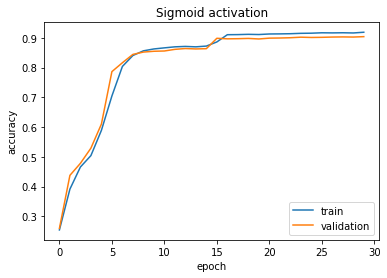

In [21]:
from matplotlib import pyplot as plt
plt.plot(histTrainSig.history['accuracy'])
plt.plot(histTrainSig.history['val_accuracy'])
plt.title('Sigmoid activation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

In [93]:
%time YpredKatSmall=annSig.predict(XtestScal) # prediction
YpredSmall= np.argmax(YpredKatSmall,axis=1) # move from one-hot to classes
# compare data
print( "Compare data formats \n", 'YpredKat[0] = ', YpredKatSmall[0],"\n Ypred[0] = ",YpredSmall[0])
accSmallSig=accuracy_score(YpredSmall,Ytest)
print('Accuracy = ', accSmallSig)

Wall time: 54.5 ms
Porównanie formatów danych 
 YpredKat[0] =  [2.6873223e-04 2.0686691e-08 2.1110412e-03 2.9699487e-04 9.8794252e-01
 3.4681939e-06 9.3772216e-03] 
 Ypred[0] =  4
Trafność dla sieci gęstej =  0.9140653690782226
